# SMILES augmentation

Let's look at an example molecule and see how we can apply different augmentation strategies to its SMILES representation.

Let's consider the fomepizole drug. One of its SMILES is given by the following string [1]: `Cc1cn[nH]c1`.

[1] Gaulton A, *et al.* (2017) 'The ChEMBL database in 2017.' Nucleic Acids Res., 45(D1) D945-D954. DOI: [10.1093/nar/gkw1074](http://dx.doi.org/10.1093/nar/gkw1074)

In [1]:
smiles = "Cc1cn[nH]c1"
print(f"SMILES of fomepizole drug: {smiles}")

SMILES of fomepizole drug: Cc1cn[nH]c1


Let's visualize the molecule using RDKit.

In [2]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw, AllChem

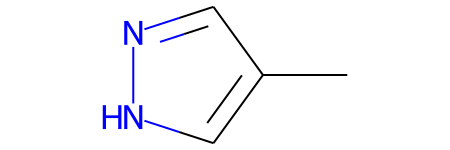

In [3]:
molecule = Chem.MolFromSmiles(smiles)
molecule

## Canonical SMILES

Let's convert the SMILES into the canonical form using RDKit.

In [4]:
from maxsmi.utils.utils_smiles import smiles_to_canonical, smiles_to_random

In [5]:
canonical_smiles = smiles_to_canonical(smiles)
print(f"Canonical SMILES of the molecule:\t {canonical_smiles} \n"
      f"Length of canonical SMILES:\t\t {len(canonical_smiles)}")

Canonical SMILES of the molecule:	 Cc1cn[nH]c1 
Length of canonical SMILES:		 11


## Random SMILES

Let's look at different variations of the SMILES.

In [6]:
smiles_to_random?

Signature: smiles_to_random(smiles, int_aug=50)
Docstring:
Takes a SMILES (not necessarily canonical) and returns `int_aug` random variations of this SMILES.

Parameters
----------
smiles : str
    SMILES string describing a compound.
int_aug : int, Optional, default: 50
    The number of random SMILES generated.

Returns
-------
list
    A list of `int_aug` random (may not be unique) SMILES or None if the initial SMILES is not valid.
File:      ~/Documents/github/maxsmi/maxsmi/utils/utils_smiles.py
Type:      function


In [7]:
random_smiles = smiles_to_random(smiles, int_aug=5)

In [8]:
print(f"Random SMILES: {random_smiles}")

Random SMILES: ['Cc1cn[nH]c1', 'c1n[nH]cc1C', 'Cc1cn[nH]c1', 'n1[nH]cc(C)c1', 'c1c(cn[nH]1)C']


# Augmentation strategies

## No augmentation
As a baseline, no random SMILES are generated, just one SMILES is kept.

In [9]:
from maxsmi.augmentation_strategies import no_augmentation

In [10]:
one_smiles = no_augmentation(smiles)
print(f"No augmentation for SMILES: {one_smiles}")

No augmentation for SMILES: ['Cc1cn[nH]c1']


## Augmentation with duplication
Here random SMILES are generated on the fly, despite duplicates.

In [11]:
from maxsmi.augmentation_strategies import augmentation_with_duplication

In [12]:
augmentation_with_duplication?

Signature: augmentation_with_duplication(smiles, augmentation_number)
Docstring:
Takes a SMILES and returns a list of random SMILES with possible duplicates.

Parameters
----------
smiles : str
    SMILES string describing a compound.
augmentation_number : int
    The integer to generate the number of random SMILES.

Returns
-------
list
    A list containing the given number of random SMILES, which might include duplicated SMILES.
File:      ~/Documents/github/maxsmi/maxsmi/augmentation_strategies.py
Type:      function


In [13]:
duplicated_smiles = augmentation_with_duplication(smiles, 100)

Since we are keeping duplicates, we should end up with 100 SMILES:

In [14]:
print(f"Number of SMILES: {len(duplicated_smiles)}")

Number of SMILES: 100


## Augmentation without duplication
Here unique random SMILES are generated.

In [15]:
from maxsmi.augmentation_strategies import augmentation_without_duplication

In [16]:
non_duplicated_smiles = augmentation_without_duplication(smiles, 100)

In [17]:
print(f"Number of (unique) SMILES: {len(non_duplicated_smiles)}")

Number of (unique) SMILES: 20


## Augmentation with reduced duplication
Here random SMILES are generated and only a fraction of duplicates are kept.

In [18]:
from maxsmi.augmentation_strategies import (
    augmentation_with_reduced_duplication
)

In [19]:
augmentation_with_reduced_duplication?

Signature: augmentation_with_reduced_duplication(smiles, augmentation_number)
Docstring:
Takes a SMILES and returns a list of random SMILES with a reduced amount of duplicates.
The reduction is square root given the number of duplicates.

Parameters
----------
smiles : str
    SMILES string describing a compound.
augmentation_number : int
    The integer to generate the number of random SMILES.

Returns
-------
list
    A list of random SMILES with a reduced amount of duplicates.
File:      ~/Documents/github/maxsmi/maxsmi/augmentation_strategies.py
Type:      function


In [20]:
reduced_duplicated_smiles = augmentation_with_reduced_duplication(smiles, 100)

In [21]:
print(f"Number of SMILES: {len(reduced_duplicated_smiles)}")

Number of SMILES: 53


## Augmentation with estimated maximum
Here we try to generate a large portion of the SMILES space.

In [22]:
from maxsmi.augmentation_strategies import augmentation_maximum_estimation

In [23]:
augmentation_maximum_estimation?

Signature: augmentation_maximum_estimation(smiles, max_duplication=10)
Docstring:
Returns augmented SMILES with estimated maximum number.

Parameters
----------
smiles : str
    SMILES string describing a compound.
max_duplication : int, Optional, default: 10
    The number of redundant SMILES that have to be generated before stopping augmentation process.

Returns
-------
list
    A list of "estimated" maximum unique random SMILES.
File:      ~/Documents/github/maxsmi/maxsmi/augmentation_strategies.py
Type:      function


In [24]:
estimated_max_smiles = augmentation_maximum_estimation(smiles)

In [25]:
print(f"Number of SMILES: {len(estimated_max_smiles)}")

Number of SMILES: 18


# Deep Neural Network Input

Here is an example of how to numerically encode a SMILES to use as input for a neural network.

## Example of one-hot encoded SMILES

Let's look at the afatinib kinase inhibitor, given by the SMILES `CN(C)CC=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(=C(C=C3)F)Cl)OC4CCOC4`.

In [26]:
import matplotlib.pyplot as plt
from matplotlib import colors
from maxsmi.utils.utils_encoding import (
    char_replacement,
    get_unique_elements_as_dict,
    one_hot_encode,
)

In [27]:
smiles = "CN(C)CC=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(=C(C=C3)F)Cl)OC4CCOC4"
print("Length of original smile:\t\t\t", len(smiles))

# Replace double symbols
new_smiles = char_replacement([smiles])[0]
print("Length of double characters replaced smiles:\t", len(new_smiles))

# Obtain dictionary for this SMILES string
smi_dict = get_unique_elements_as_dict(new_smiles)
print("Number of unique characters: \t\t\t", len(smi_dict))

# One-hot encode SMILES string
one_hot_smiles = one_hot_encode(new_smiles, smi_dict)
print("Shape of one-hot encoded matrix: \t\t", one_hot_smiles.shape)

Length of original smile:			 67
Length of double characters replaced smiles:	 66
Number of unique characters: 			 12
Shape of one-hot encoded matrix: 		 (12, 66)


Let's plot the molecule using RDKit.

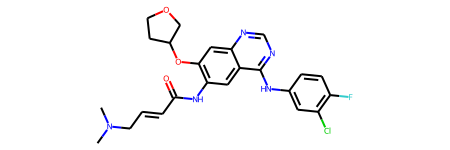

In [28]:
molecule = Chem.MolFromSmiles(smiles)
molecule

We now visualize the one-hot encoded SMILES.

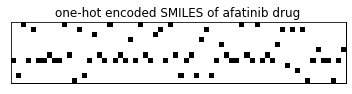

In [29]:
f, ax = plt.subplots()
ax.imshow(one_hot_smiles, cmap=colors.ListedColormap([(1, 1, 1), "black"]))
ax.set_xticks([])
ax.set_yticks([])
ax.patch.set_edgecolor("black")
ax.patch.set_linewidth("1")
plt.title(f"one-hot encoded SMILES of afatinib drug")
plt.show()

# Data

Let's look at some of the data available in maxsmi.

In [30]:
from maxsmi.utils.utils_data import data_retrieval
from maxsmi.utils.utils_smiles import smiles_to_canonical, smiles_to_random

In [31]:
data_retrieval?

Signature: data_retrieval(target_data='ESOL')
Docstring:
Retrieve data from MoleculeNet, or ChEMBL.

Parameters
----------
target_data: str
    The target data to be considered. The default is the ESOL data set.

Returns
-------
dataframe: pd.Pandas
    Pandas data frame with two columns:
        - `smiles`: SMILES encoding of the compounds.
        - `target`: the measured target values.
File:      ~/Documents/github/maxsmi/maxsmi/utils/utils_data.py
Type:      function


Currently implemented data sets:

* ESOL (and ESOL_small)
* FreeSolv
* lipophilicity
* EGFR affinity (ChEMBL28/Kinodata)

In [32]:
# Read data
df = data_retrieval("ESOL")

# Canonical SMILES
df["canonical_smiles"] = df["smiles"].apply(smiles_to_canonical)

# Random SMILES
df["random_smiles"] = df["canonical_smiles"].apply(smiles_to_random, args=(2,))

print(f"Shape of dataframe: {df.shape}\nColumns: {df.columns}")

Shape of dataframe: (1128, 4)
Columns: Index(['target', 'smiles', 'canonical_smiles', 'random_smiles'], dtype='object')


In [33]:
df.head(4)

,target,smiles,canonical_smiles,random_smiles
0,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c...,[C1(C(O)C(OCC2OC(C(C(C2O)O)O)OC(C#N)c2ccccc2)O...
1,-3.30,Cc1occc1C(=O)Nc2ccccc2,Cc1occc1C(=O)Nc1ccccc1,"[Cc1c(C(=O)Nc2ccccc2)cco1, N(C(=O)c1ccoc1C)c1c..."
2,-2.06,CC(C)=CCCC(C)=CC(=O),CC(C)=CCCC(C)=CC=O,"[C(CCC(=CC=O)C)=C(C)C, O=CC=C(CCC=C(C)C)C]"
3,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,c1ccc2c(c1)ccc1c2ccc2c3ccccc3ccc21,"[c1cc2c(ccc3c2cccc3)c2ccc3ccccc3c21, c1cccc2c3..."
